# KNN Project 

The Chess (King-Rook) dataset is a machine learning dataset that focuses on the context of a specific chess scenario, where a King and Rook are pitted against a lone King. The dataset contains features such as the positions of the Kings and Rook on the chessboard, along with the optimal move to win the game. With its 3,196 instances and 6 attributes, this dataset is suitable for various classification tasks. By applying the k-nearest neighbors (KNN) algorithm on this dataset, it is possible to develop a predictive model that can suggest the optimal move based on the positions of the chess pieces. KNN in the context of this dataset provides a practical approach for decision-making in King-Rook chess scenarios.

###### Loading the Data Set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\Galaxy Computers\\Desktop\\krkopt.data'); 
column_names = ['White_King_file', 'White_King_rank', 'White_Rook_file', 
                'White_Rook_rank', 'Black_King_file', 'Black_King_rank', 'Optimal_Move']
data.columns = column_names

data

,White_King_file,White_King_rank,White_Rook_file,White_Rook_rank,Black_King_file,Black_King_rank,Optimal_Move
0,a,1,c,1,c,2,draw
1,a,1,c,1,d,1,draw
2,a,1,c,1,d,2,draw
3,a,1,c,2,c,1,draw
4,a,1,c,2,c,3,draw
...,...,...,...,...,...,...,...
28050,b,1,g,7,e,5,sixteen
28051,b,1,g,7,e,6,sixteen
28052,b,1,g,7,e,7,sixteen
28053,b,1,g,7,f,5,sixteen


##### Data Understanding 

In [3]:
data.describe()

,White_King_rank,White_Rook_rank,Black_King_rank
count,28055.000000,28055.000000,28055.000000
mean,1.854037,4.512458,4.451898
std,0.926417,2.282746,2.248379
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,2.000000,5.000000,4.000000
75%,2.000000,6.000000,6.000000
max,4.000000,8.000000,8.000000


In [4]:
data.groupby('Optimal_Move').size()

Optimal_Move
draw        2795
eight       1433
eleven      2854
fifteen     2166
five         471
four         198
fourteen    4553
nine        1712
one           78
seven        683
six          592
sixteen      390
ten         1985
thirteen    4194
three         81
twelve      3597
two          246
zero          27
dtype: int64

In [5]:
feature_columns = ['White_King_rank', 'White_Rook_rank', 'Black_King_rank']

In [6]:
X = data[feature_columns].values
X

array([[1, 1, 2],
       [1, 1, 1],
       [1, 1, 2],
       ...,
       [1, 7, 7],
       [1, 7, 5],
       [1, 7, 5]], dtype=int64)

In [7]:
y = data['Optimal_Move'].values
y

array(['draw', 'draw', 'draw', ..., 'sixteen', 'sixteen', 'sixteen'],
      dtype=object)

In [8]:
print('Optimal_Move_1:\n', y[0:10])
print('\n')
print('Optimal_Move_2:\n', y[20000:20010])
print('\n')
print('Optimal_Move_3:\n', y[28000:28060])

Optimal_Move_1:
 ['draw' 'draw' 'draw' 'draw' 'draw' 'draw' 'draw' 'draw' 'draw' 'draw']


Optimal_Move_2:
 ['thirteen' 'thirteen' 'thirteen' 'thirteen' 'thirteen' 'thirteen'
 'thirteen' 'thirteen' 'thirteen' 'thirteen']


Optimal_Move_3:
 ['sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen'
 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen'
 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen'
 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen'
 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen'
 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen'
 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen'
 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen' 'sixteen']


##### Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:

le = LabelEncoder()

In [11]:

y = le.fit_transform(y)

In [12]:
print('Optimal_Move_1:\n', y[0:10])
print('\n')
print('Optimal_Move_2:\n', y[20000:20010])
print('\n')
print('Optimal_Move_3:\n', y[28000:28060])

Optimal_Move_1:
 [0 0 0 0 0 0 0 0 0 0]


Optimal_Move_2:
 [13 13 13 13 13 13 13 13 13 13]


Optimal_Move_3:
 [11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11]


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 4)

In [15]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_train: (19638, 3)
y_train: (19638,)


In [16]:

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_test: (8417, 3)
y_test: (8417,)


In [17]:
columns_to_drop = ['White_King_file', 'White_Rook_file', 'Black_King_file']
data = data.drop(columns=columns_to_drop)

In [18]:
data.head()

,White_King_rank,White_Rook_rank,Black_King_rank,Optimal_Move
0,1,1,2,draw
1,1,1,1,draw
2,1,1,2,draw
3,1,2,1,draw
4,1,2,3,draw


<Figure size 432x288 with 0 Axes>

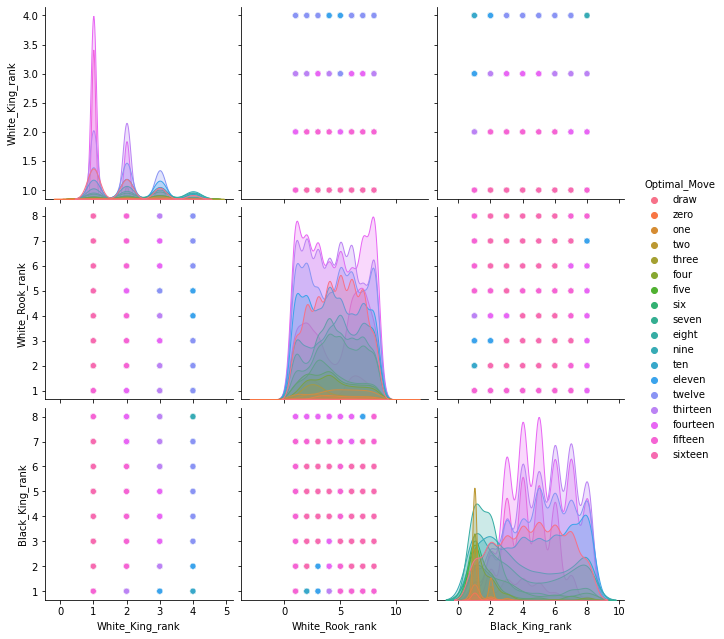

In [19]:
plt.figure()
sns.pairplot(data,hue="Optimal_Move", size=3)
plt.show()

<Figure size 432x288 with 0 Axes>

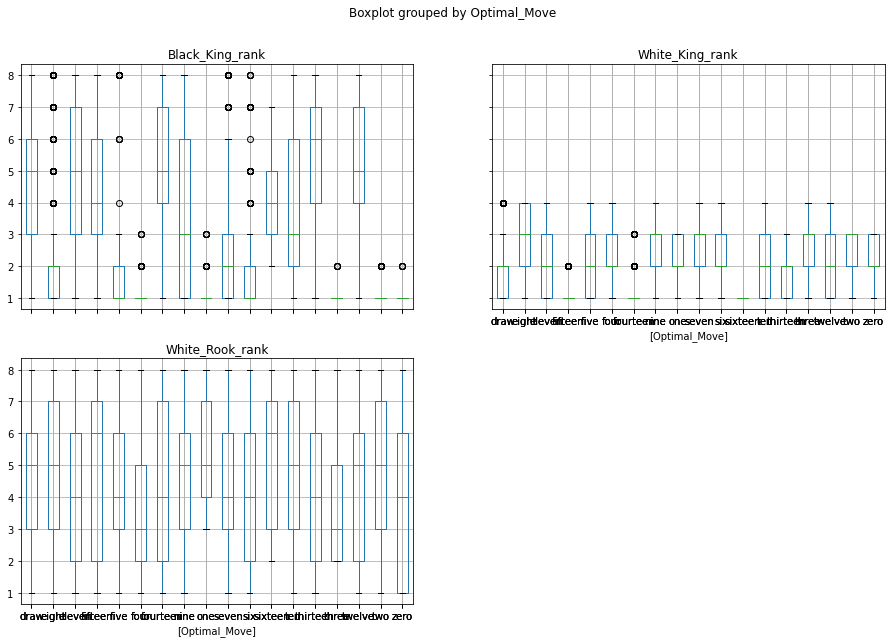

In [20]:
plt.figure()
data.boxplot(by="Optimal_Move", figsize=(15, 10))
plt.show()

##### Model Development

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [22]:
def sklearn_knn(train_data, label_data, test_data, k):
   
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(train_data, label_data)

    predict_label = knn.predict(test_data)

    return predict_label

In [34]:
y_predict = sklearn_knn(X_train, y_train, X_test, 56)
y_predict

array([ 6, 13,  6, ...,  1,  3,  0])

In [35]:
y_predict.shape

(8417,)

##### Measuring Model Accuracy

In [36]:
def accuracy(test_labels, pred_labels):  

    correct = np.sum(test_labels == pred_labels) 

    n = len(test_labels) 

    accur = correct / n
    
    return accur

In [37]:

accuracy(y_test, y_predict)

0.32315551859332303

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_sklearn = accuracy_score(y_test, y_predict)*100

In [40]:
print('Model Accuracy ' + str(round(accuracy_sklearn, 2)) + ' %.')

Model Accuracy 32.32 %.


#### Choosing the K Value

In [41]:
n = len(data)
n

28055

In [42]:
import math
k_max = math.sqrt(n)
k_max

167.49626861515452

In [43]:
normal_accuracy = []  

# olabilecek K değerleri
k_value = range(1, 167)

# döngü ile tek tek K değerlerine bak
for k in k_value:
    y_predict = sklearn_knn(X_train, y_train, X_test, k)
    accur = accuracy_score(y_test, y_predict)
    normal_accuracy.append(accur)


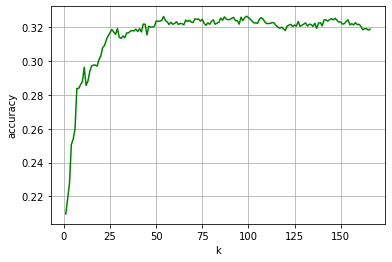

In [44]:
plt.xlabel("k")
plt.ylabel("accuracy")

plt.plot(k_value, normal_accuracy, c='g')

plt.grid(True)  

plt.show()